In [1]:
# 필요한 라이브러리 호출
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# 데이터 호출
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('./car_evaluation.csv', names=cols, header=None)

<AxesSubplot:ylabel='output'>

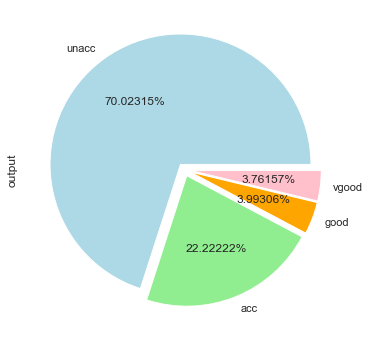

In [3]:
# 예제 데이터셋 분포 
plot_size = plt.rcParams["figure.figsize"]
plot_size [ 0 ] = 8
plot_size [ 1 ] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind="pie", autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode =(0.05, 0.05,0.05,0.05))

In [6]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')
doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')
labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1]),)
dense_layer_1 = Dense(15, activation="relu")(input_layer)
dense_layer_2 = Dense(10, activation="relu")(dense_layer_1)
output = Dense(y.shape[1], activation="softmax")(dense_layer_2)
                       
model = Model(inputs=input_layer, outputs=output)
                       
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 2ms/step - loss: 1.1475 - acc: 0.5195 - val_loss: 0.9311 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 1ms/step - loss: 0.7110 - acc: 0.7321 - val_loss: 0.7273 - val_acc: 0.6606
Epoch 3/50
139/139 [==============================] - 0s 1ms/step - loss: 0.5248 - acc: 0.7864 - val_loss: 0.5786 - val_acc: 0.7762
Epoch 4/50
139/139 [==============================] - 0s 1ms/step - loss: 0.4126 - acc: 0.8507 - val_loss: 0.5012 - val_acc: 0.8051
Epoch 5/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3549 - acc: 0.8796 - val_loss: 0.4575 - val_acc: 0.8159
Epoch 6/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3220 - acc: 0.8796 - val_loss: 0.4175 - val_acc: 0.8484
Epoch 7/50
139/139 [==============================] - 0s 1ms/step - loss: 0.2962 - acc: 0.8860 - val_loss: 0.3875 - val_acc: 0.8448
Epoch 8/50
139/139 [==============================] - 0s 1ms/step - loss: 0.

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.0868 - acc: 0.9653
Test Score: 0.08675294369459152
Test Accuracy: 0.9653179049491882
